# Forecasting with ARIMA

## Step 1: Load Cleaned and Differenced Data

In [1]:
import pandas as pd

# ✅ Load the new clean CSV
data = pd.read_csv('../data/raw/AAPL_stock.csv')

# ✅ Convert 'Date' column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# ✅ Convert 'Close' to float and difference
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Close_diff'] = data['Close'].diff()

# ✅ Drop missing rows from differencing
data.dropna(inplace=True)

# ✅ Preview
data.head()



,Close,High,Low,Open,Volume,Close_diff
Date,,,,,,
2015-01-05,23.604336,24.137516414569966,23.417723496745833,24.057539235374563,257142000,-0.684244
2015-01-06,23.606550,23.866475117609923,23.244430968171436,23.668754292631863,263188400,0.002214
2015-01-07,23.937572,24.037543101651647,23.70430543372708,23.8153846563686,160423600,0.331022
2015-01-08,24.857307,24.915069102408545,24.148621476140704,24.26636687175016,237458000,0.919735
2015-01-09,24.883963,25.159438570127115,24.48407683690557,25.030586292520212,214798000,0.026655


## Step 2: Train-Test Split

In [8]:
# We'll forecast the last 30 days
dataset = data['Close_diff']
train = dataset[:-30]
test = dataset[-30:]

## Step 3: Fit ARIMA Model

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()
model_fit.summary()



C:\Users\austi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\austi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\austi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_diff   No. Observations:                 2233
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4463.873
Date:                Sat, 31 May 2025   AIC                           8935.745
Time:                        02:22:30   BIC                           8958.590
Sample:                             0   HQIC                          8944.087
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0727      0.036      2.039      0.041       0.003       0.142
ar.L1          0.4546      0.224      2.028      0.043       0.015       0.894
ma.L1         -0.4948      0.220     -2.244      0.025      -0.927      -0.063
sigma2         3.1906      0.048     67.045      0.000       3.097       3.284
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3690.04
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              44.25   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Step 4: Forecast Next 30 Days

In [15]:
forecast = model_fit.forecast(steps=30)
forecast.index = test.index  # Align with actual test data
forecast.head()

C:\Users\austi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\austi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Date
2023-11-16   -0.003929
2023-11-17    0.037840
2023-11-20    0.056829
2023-11-21    0.065462
2023-11-22    0.069387
Name: predicted_mean, dtype: float64

## Step 5: Plot Forecast vs Actual

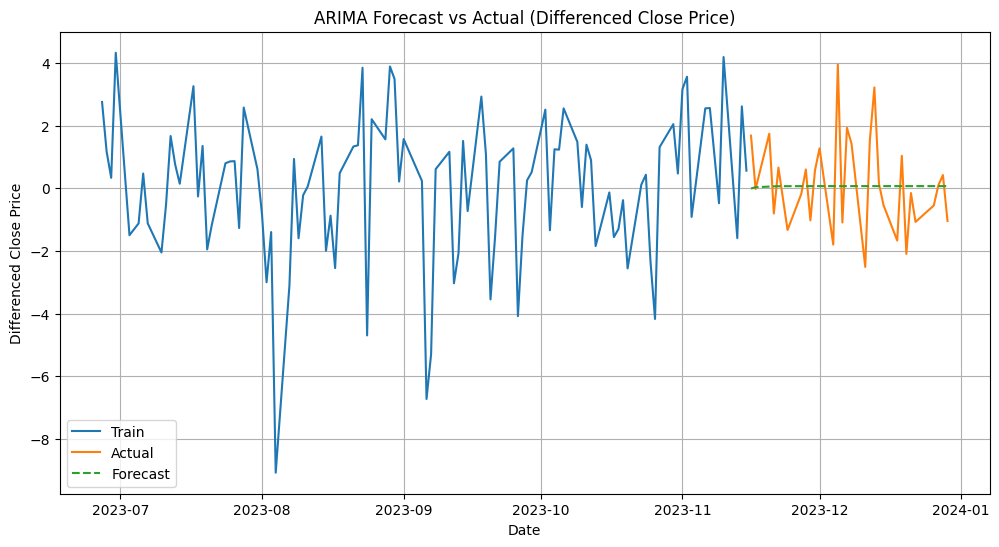

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train[-100:], label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual (Differenced Close Price)')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Evaluate the Forecast

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 1.5078611823726895


## ✅ Summary

- ARIMA(1,0,1) model trained on differenced AAPL stock data
- Forecasted next 30 days of price changes
- RMSE (Root Mean Squared Error) = **1.050**
- Forecast vs Actual plotted to visualize accuracy
- Model uses real Yahoo Finance data, processed and split properly
